# Molecular Dynamics Analysis Tool
## A tutorial for analysing molecular trajectories of complex systems using a python module
#### Author: Nikolaos Patsalidis

## Abstract

This python module was developed to be a tool, which can facilitate research in the field of molecular dynamics of complex systems. It was developed and it is still be upgraded for maintaining the following objectives 

1)  Modularity / Generality <\b>

2)  Efficiency

3)  user friendlyness 
    
The module is used by writing very small scripts in python, which usually includes creating an analysis object giving the system's details and then simply calling a function to calculate the property of interest. The returned data can be stored in a text format or be plot directly using for example matplotlib. By the time this notebook is written there are already 14 examples of how to use the algorithm within the folder "testing v1.0". Here we will give less examples but I will attempt to get you familiar with the code.

### Let's begin this turorial
Begginer level of python it would necessary  

## 1. Import the module
To import the module you need to add the file "md_analysis.py" and "lammpsreader.py" either within your script directory, or in your python path (you can find it by running "where python"), or by inserting the absolute path in which these two files are stored. For example a local repository in which you store or develop the algorithm like below:

In [1]:
import sys
sys.path.insert(0, '/Users/n.patsalidis/Desktop/PHD/REPOSITORIES/MDanalysis')
import md_analysis as mda 
import numpy as np

Now mda is the module that we use to perform our analysis. Lets continue

## 2. Creating an analysis object and reading the trajectory
### 2.1 Gromacs trajectories


To read a trajectory and analyze it the algorithm needs to understand the system's topology, i.e. atoms, bonds (or otherwise the connectivity). For gromacs trajectories you need to give the same ".itp" file(s) you use to run the Molecular Dynamics (md) simulation
##### Let's initialize
The files correspond to a bulk Polybutadiene system.
Notice the output. Allmost all functions print the time that they need to run

In [2]:
obj_bulk = mda.Analysis('trr/bulkPRwh.trr', # trajectory file
                        'itp/topol_UA_PB30.itp', # connectivity file
                        'gro/bulk.gro' # topology file (only needs one frame)
                        )


19:35:20
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "read_atoms_and_connectivity_from_itp"
 Total time --> 0h : 0' : 0" : 0.007"'
 --------
19:35:21
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "analysis_initialization"
 Total time --> 0h : 0' : 0" : 0.335"'
 --------


### 2.2 Access some attributes

    Check some of the attributes this object has. For example the connectivity in key (atom ids) value (type) pairs

In [3]:
obj_bulk.connectivity

{(0, 1): ('CD', 'CE'),
 (1, 2): ('CD', 'CD'),
 (2, 3): ('C', 'CD'),
 (3, 4): ('C', 'C'),
 (4, 5): ('C', 'CD'),
 (5, 6): ('CD', 'CD'),
 (6, 7): ('C', 'CD'),
 (7, 8): ('C', 'C'),
 (8, 9): ('C', 'CD'),
 (9, 10): ('CD', 'CD'),
 (10, 11): ('C', 'CD'),
 (11, 12): ('C', 'C'),
 (12, 13): ('C', 'CD'),
 (13, 14): ('CD', 'CD'),
 (14, 15): ('C', 'CD'),
 (15, 16): ('C', 'C'),
 (16, 17): ('C', 'CD'),
 (17, 18): ('CD', 'CD'),
 (18, 19): ('C', 'CD'),
 (19, 20): ('C', 'C'),
 (20, 21): ('C', 'CD'),
 (21, 22): ('CD', 'CD'),
 (22, 23): ('C', 'CD'),
 (23, 24): ('C', 'C'),
 (24, 25): ('C', 'CD'),
 (25, 26): ('CD', 'CD'),
 (26, 27): ('C', 'CD'),
 (27, 28): ('C', 'C'),
 (28, 29): ('C', 'CD'),
 (29, 30): ('CD', 'CD'),
 (30, 31): ('C', 'CD'),
 (31, 32): ('C', 'C'),
 (32, 33): ('C', 'CD'),
 (33, 34): ('CD', 'CD'),
 (34, 35): ('C', 'CD'),
 (35, 36): ('C', 'C'),
 (36, 37): ('C', 'CD'),
 (37, 38): ('CD', 'CD'),
 (38, 39): ('C', 'CD'),
 (39, 40): ('C', 'C'),
 (40, 41): ('C', 'CD'),
 (41, 42): ('CD', 'CD'),
 (42, 43)

    The same holds for angles and dihedrals

In [4]:
#obj_bulk.angles
obj_bulk.dihedrals 

{(0, 1, 2, 3): ('C', 'CD', 'CD', 'CE'),
 (1, 2, 3, 4): ('C', 'C', 'CD', 'CD'),
 (2, 3, 4, 5): ('CD', 'C', 'C', 'CD'),
 (3, 4, 5, 6): ('C', 'C', 'CD', 'CD'),
 (4, 5, 6, 7): ('C', 'CD', 'CD', 'C'),
 (5, 6, 7, 8): ('C', 'C', 'CD', 'CD'),
 (6, 7, 8, 9): ('CD', 'C', 'C', 'CD'),
 (7, 8, 9, 10): ('C', 'C', 'CD', 'CD'),
 (8, 9, 10, 11): ('C', 'CD', 'CD', 'C'),
 (9, 10, 11, 12): ('C', 'C', 'CD', 'CD'),
 (10, 11, 12, 13): ('CD', 'C', 'C', 'CD'),
 (11, 12, 13, 14): ('C', 'C', 'CD', 'CD'),
 (12, 13, 14, 15): ('C', 'CD', 'CD', 'C'),
 (13, 14, 15, 16): ('C', 'C', 'CD', 'CD'),
 (14, 15, 16, 17): ('CD', 'C', 'C', 'CD'),
 (15, 16, 17, 18): ('C', 'C', 'CD', 'CD'),
 (16, 17, 18, 19): ('C', 'CD', 'CD', 'C'),
 (17, 18, 19, 20): ('C', 'C', 'CD', 'CD'),
 (18, 19, 20, 21): ('CD', 'C', 'C', 'CD'),
 (19, 20, 21, 22): ('C', 'C', 'CD', 'CD'),
 (20, 21, 22, 23): ('C', 'CD', 'CD', 'C'),
 (21, 22, 23, 24): ('C', 'C', 'CD', 'CD'),
 (22, 23, 24, 25): ('CD', 'C', 'C', 'CD'),
 (23, 24, 25, 26): ('C', 'C', 'CD', 'CD'),
 

    Each id of these bonded interactions is also stored "per_type" in numpy arrays for fast manipulation of the data

In [5]:
obj_bulk.connectivity_per_type
#obj_bulk.angles_per_type
#obj_bulk.dihedrals_per_type

{('CD',
  'CE'): array([[    0,     1],
        [  118,   119],
        [  120,   121],
        [  238,   239],
        [  240,   241],
        [  358,   359],
        [  360,   361],
        [  478,   479],
        [  480,   481],
        [  598,   599],
        [  600,   601],
        [  718,   719],
        [  720,   721],
        [  838,   839],
        [  840,   841],
        [  958,   959],
        [  960,   961],
        [ 1078,  1079],
        [ 1080,  1081],
        [ 1198,  1199],
        [ 1200,  1201],
        [ 1318,  1319],
        [ 1320,  1321],
        [ 1438,  1439],
        [ 1440,  1441],
        [ 1558,  1559],
        [ 1560,  1561],
        [ 1678,  1679],
        [ 1680,  1681],
        [ 1798,  1799],
        [ 1800,  1801],
        [ 1918,  1919],
        [ 1920,  1921],
        [ 2038,  2039],
        [ 2040,  2041],
        [ 2158,  2159],
        [ 2160,  2161],
        [ 2278,  2279],
        [ 2280,  2281],
        [ 2398,  2399],
        [ 2400,  2401],


##### All these data are stored in dictionaries. Dictionaries are the fastest data structure to access to.  Internally the code stores data that are not to be modified in dictionaries and when computation happens the numpy arrays are used.

In [6]:
print(type(obj_bulk.dihedrals) , type(obj_bulk.connectivity_per_type))

<class 'dict'> <class 'dict'>


###### Information about each trajectory frame is also stored in dictionaries

In [7]:
obj_bulk.timeframes

{}

    why is this empty???
##### we haven't read the file yet. Lets see how to do this

In [8]:
obj_bulk.read_file() # the algorithm remember the filename from initialization

19:35:30
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "read_trr_file"
 Time/frame --> 0h : 0' : 0" : 0.005"'
 Total time --> 0h : 0' : 9" : 0.541"'
 --------


In [9]:
obj_bulk.timeframes

{0: {'ir_size': 0,
  'e_size': 0,
  'box_size': 36,
  'vir_size': 0,
  'pres_size': 0,
  'top_size': 0,
  'sym_size': 0,
  'x_size': 288000,
  'v_size': 0,
  'f_size': 0,
  'natoms': 24000,
  'step': 0,
  'nre': 0,
  'time': 0.0,
  'lambda': 0.0,
  'endian': '>',
  'double': False,
  'boxsize': array([9.48612976, 7.25060987, 9.24580002]),
  'coords': array([[ 6.02400017,  5.77600002,  4.49599981],
         [ 5.95800018,  5.66099977,  4.56899977],
         [ 5.82499981,  5.65399981,  4.58900023],
         ...,
         [ 4.40199995, 11.00699997, -0.20800018],
         [ 4.32200003, 11.0710001 , -0.11999989],
         [ 4.18499994, 11.12100029, -0.14900017]])},
 1: {'ir_size': 0,
  'e_size': 0,
  'box_size': 36,
  'vir_size': 0,
  'pres_size': 0,
  'top_size': 0,
  'sym_size': 0,
  'x_size': 288000,
  'v_size': 0,
  'f_size': 0,
  'natoms': 24000,
  'step': 100000,
  'nre': 0,
  'time': 100.0,
  'lambda': 0.0,
  'endian': '>',
  'double': False,
  'boxsize': array([9.48612976, 7.2506094 

    you can access timeframe i by the following, for example timeframe 10

In [10]:
timeframe10 = obj_bulk.timeframes[10] # gets timeframe 10

In [11]:
print(timeframe10.keys()) # Let's see the keys of it

dict_keys(['ir_size', 'e_size', 'box_size', 'vir_size', 'pres_size', 'top_size', 'sym_size', 'x_size', 'v_size', 'f_size', 'natoms', 'step', 'nre', 'time', 'lambda', 'endian', 'double', 'boxsize', 'coords'])


In [12]:
coords10 = timeframe10['coords']

In [13]:
print(coords10.shape) # this is a numpy array

(24000, 3)


In [14]:
c10 = obj_bulk.get_coords(10) # we access it in the same way

In [15]:
(c10 == coords10).all()

True

In [16]:
box_of_frame200 = obj_bulk.get_box(200)

In [17]:
box_of_frame200

array([9.47625351, 7.24306059, 9.23617458])

### 2.2.1 More attributes

In [18]:
print(obj_bulk.natoms,
obj_bulk.nbonds,
obj_bulk.nangles,
obj_bulk.ndihedrals)

24000 23800 23600 23400


In [19]:
obj_bulk.at_ids

array([    0,     1,     2, ..., 23997, 23998, 23999])

In [20]:
obj_bulk.at_types

array(['CE', 'CD', 'CD', ..., 'CD', 'CD', 'CE'], dtype=object)

In [21]:
obj_bulk.mol_ids

array([  1,   1,   1, ..., 200, 200, 200])

In [22]:
obj_bulk.mol_names

array(['PB', 'PB', 'PB', ..., 'PB', 'PB', 'PB'], dtype=object)

These four arrays have the same dimension (equal to the number of atoms)

In [23]:
print(obj_bulk.at_ids.shape[0],
     obj_bulk.mol_ids.shape[0],
     obj_bulk.at_types.shape[0],
     obj_bulk.mol_names.shape[0],
     obj_bulk.natoms)

24000 24000 24000 24000 24000


### 2.3 Some properties

In [24]:
boxmean = obj_bulk.box_mean()
boxmean

19:35:31
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "box_mean"
 Total time --> 0h : 0' : 0" : 0.003"'
 --------


array([9.49079445, 7.254175  , 9.25034679])

In [25]:
boxvar = obj_bulk.box_variance()
boxvar

19:35:31
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "box_mean"
 Total time --> 0h : 0' : 0" : 0.003"'
 --------
19:35:31
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "box_variance"
 Total time --> 0h : 0' : 0" : 0.008"'
 --------


array([0.00018537, 0.0001083 , 0.0001761 ])

### 2.3.1 Pair distribution function

In [26]:
binl = 0.02 # bin length
dmax = 2.0  # maximum distance
obj_bulk.cut_timeframes(30,33) # we cut all the frames and we keep only 30 to 33
pd = obj_bulk.calc_pair_distribution(binl,dmax,type1='CD',type2='C',density='number',normalize=True) # returns a dictionary

19:35:37
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "calc_pair_distribution"
 Time/frame --> 0h : 0' : 1" : 0.811"'
 Total time --> 0h : 0' : 5" : 0.432"'
 --------


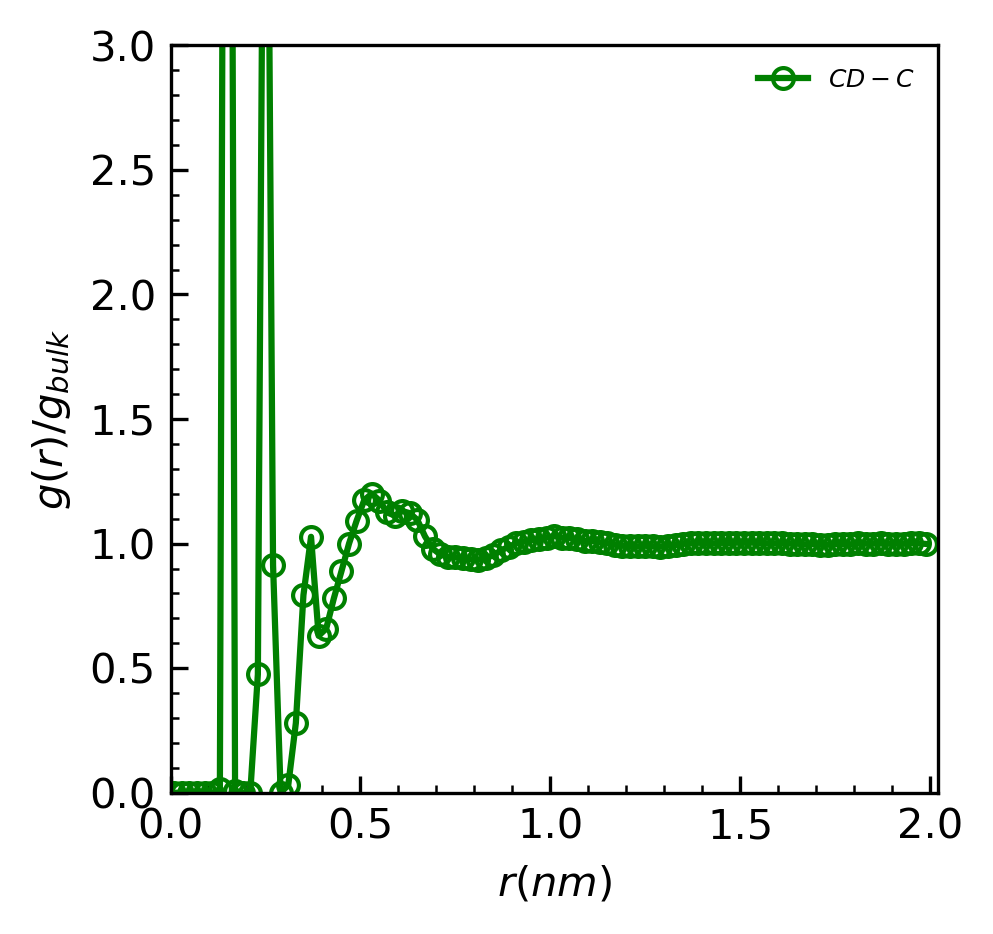

In [27]:
from matplotlib import pyplot as plt
figsize = (3.3,3.3)
dpi = 300
fig=plt.figure(figsize=figsize,dpi=dpi)
plt.minorticks_on()
plt.tick_params(direction='in', which='minor',length=2)
plt.tick_params(direction='in', which='major',length=4)
plt.xlim([0,dmax+binl])
plt.ylim([0,3])
plt.xlabel(r'$r (nm)$')
plt.ylabel(r'$g(r)/g_{bulk}$')
plt.plot(pd['d'],pd['gr'],markersize=5,
         marker='o',fillstyle='none',label = r'$CD-C$',color='green')

plt.legend(frameon=False,fontsize=6)
plt.show()

###### read again if you want to have again all the timeframes

In [28]:
#obj_bulk.read_file() 

### 2.4 Initialize and read a system with a particle

In [29]:
trajf = 'trr/PRwh_dt1.trr' # trajectory file
conftype = 'zdir' #type of confinmnent
connectivity_info = ['itp/topol_UA_PB30.itp','itp/alu_to.itp'] # bond information
topol_file = 'gro/alupb.gro'
obj_substrate = mda.Analysis_Confined(trajf, #trajectory file
                        connectivity_info, # can be either a list of files or just one file
                        conftype, # signifies what functions to use to calculate e.g. the distance, or the volume of each bin
                        topol_file = topol_file, # if it's gromacs setup we need a gro file of one frame to read atom types, molecule types and exetra 
                        particle='ALU',polymer='PB') # Need to give the particle and polymer name 

obj_substrate.read_file()

19:35:38
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "read_atoms_and_connectivity_from_itp"
 Total time --> 0h : 0' : 0" : 0.009"'
 --------
19:35:38
[ WARNING ]
[md_analysis.py -> read_connectivity_from_itp() -> line 2186]
 Excepted ValueError : zero-size array to reduction operation minimum which has no identity
 --------
19:35:38
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "read_atoms_and_connectivity_from_itp"
 Total time --> 0h : 0' : 0" : 0.036"'
 --------
19:35:38
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "analysis_initialization"
 Total time --> 0h : 0' : 0" : 0.334"'
 --------
19:35:38
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "confined_system_initialization"
 Total time --> 0h : 0' : 0" : 0.240"'
 --------
19:35:50
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "read_trr_file"
 Time/frame --> 0h : 0' : 0" : 0.007"'
 Total time --> 0h : 0' : 11" : 0.889"'
 --------


    Note that we give two itp files in a form of list    

### 2.4.1 Attributes
same as before with additions

In [30]:
obj_substrate.at_types

array(['CE', 'CD', 'CD', ..., 'O', 'O', 'O'], dtype=object)

In [31]:
obj_substrate.mol_names

array(['PB', 'PB', 'PB', ..., 'ALU', 'ALU', 'ALU'], dtype=object)

In [32]:
print(obj_substrate.at_ids.shape[0],
     obj_substrate.mol_ids.shape[0],
     obj_substrate.at_types.shape[0],
     obj_substrate.mol_names.shape[0],
     obj_substrate.natoms)

33720 33720 33720 33720 33720


In [33]:
obj_substrate.particle_filt

array([False, False, False, ...,  True,  True,  True])

In [34]:
obj_substrate.polymer_filt

array([ True,  True,  True, ..., False, False, False])

In [35]:
print(obj_substrate.polymer_filt.shape[0],
     obj_substrate.particle_filt.shape[0],
     obj_substrate.natoms)

33720 33720 33720


### 2.5 Reading Lammps trajectory and topology

In [36]:


obj_silica = mda.Analysis_Confined('lammps_files/trajectory.lammpstrj', #lammps trajectory file
                             'lammps_files/centered.ltop', # lammps topology file
                              'spherical_particle', #confinemt type
                              polymer_method ='molids',
                              particle='34',
                              polymer=np.arange(0,33,1,dtype=int)
                              )
obj_silica.read_file()

19:35:50
[ WARNING ]
[md_analysis.py -> read_lammps_topol() -> line 2308]
(4950, 5773) is already in connectivity 
 --------
19:35:50
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "read_lammps_topol"
 Total time --> 0h : 0' : 0" : 0.060"'
 --------
19:35:51
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "analysis_initialization"
 Total time --> 0h : 0' : 0" : 0.252"'
 --------
19:35:51
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "confined_system_initialization"
 Total time --> 0h : 0' : 0" : 0.024"'
 --------
19:35:54
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "read_lammpstrj_file"
 Time/frame --> 0h : 0' : 0" : 0.104"'
 Total time --> 0h : 0' : 3" : 0.228"'
 --------


### 3.0 Calculate properties

In [37]:
densProf = obj_substrate.calc_density_profile(0.025,5,option='pertype') #returns a dictionary

19:36:31
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "calc_density_profile"
 Time/frame --> 0h : 0' : 0" : 0.022"'
 Total time --> 0h : 0' : 37" : 0.388"'
 --------


In [38]:
topol_vector = 4
P2 = obj_silica.calc_P2(0.025,4,topol_vector)
P2bridge = obj_silica.calc_P2(0.025,4,topol_vector,option='bridge',dads=2.55)

19:36:31
[ INFO ]
[md_analysis.py -> calc_P2() -> line 3924]
topol 4: 14679 vectors  
 --------
/Users/n.patsalidis/Desktop/PHD/REPOSITORIES/MDanalysis\md_analysis.py:3939: RuntimeWarning: Mean of empty slice.
  costh2_mean = np.array([ np.array(c).mean() for c in costh_unv ])
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dt

In [39]:
densProf.keys()

dict_keys(['d', 'rho', 'Alo', 'Alt', 'C', 'CD', 'CE', 'O'])

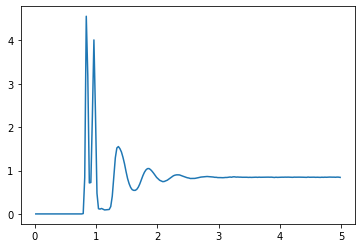

In [40]:
plt.plot(densProf['d'],densProf['rho'])

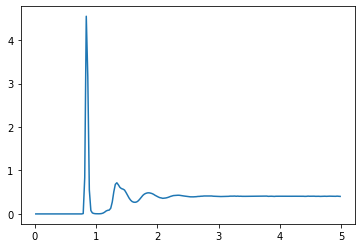

In [41]:
plt.plot(densProf['d'],densProf['CD'])

In [42]:
P2bridge.keys()

dict_keys(['d', 'P2', 'P2(std)'])

In [43]:
P2.keys()

dict_keys(['d', 'P2', 'P2(std)'])

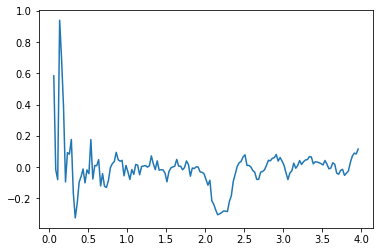

In [44]:
plt.plot(P2['d'],P2['P2'])

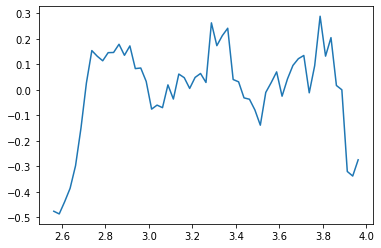

In [45]:
plt.plot(P2bridge['d'],P2bridge['P2'])

<ErrorbarContainer object of 3 artists>

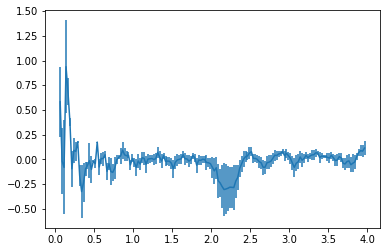

In [46]:
plt.errorbar(P2['d'],P2['P2'],yerr=P2['P2(std)'])

In [47]:
P2sub = obj_substrate.calc_P2(0.02,4,['C','CD','CD','C'])

19:36:35
[ INFO ]
[md_analysis.py -> calc_P2() -> line 3924]
topol ['C', 'CD', 'CD', 'C']: 5600 vectors  
 --------
/Users/n.patsalidis/Desktop/PHD/REPOSITORIES/MDanalysis\md_analysis.py:3939: RuntimeWarning: Mean of empty slice.
  costh2_mean = np.array([ np.array(c).mean() for c in costh_unv ])
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_sc

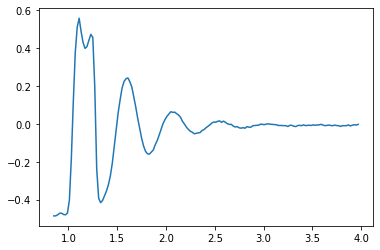

In [48]:
plt.plot(P2sub['d'],P2sub['P2'])

In [49]:
P2sub_tails = obj_substrate.calc_P2(0.02,4,['C','CD','CD','C'],option='tail',dads=1.0)

19:36:41
[ INFO ]
[md_analysis.py -> calc_P2() -> line 3924]
topol ['C', 'CD', 'CD', 'C']: 5600 vectors  
 --------
/Users/n.patsalidis/Desktop/PHD/REPOSITORIES/MDanalysis\md_analysis.py:3939: RuntimeWarning: Mean of empty slice.
  costh2_mean = np.array([ np.array(c).mean() for c in costh_unv ])
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_sc

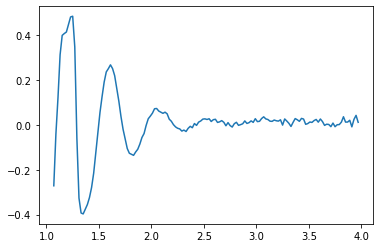

In [50]:
plt.plot(P2sub_tails['d'],P2sub_tails['P2'])

In [51]:
chainChars = obj_substrate.calc_chain_characteristics(0.025,4)

C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\n.patsalidis\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
19:37:54
[ INFO ]
[md_analysis.py -> print_time() -> line 195]
Function "calc_chain_c

In [52]:
chainChars.keys()

dict_keys(['d', 'k2', 'k2(std)', 'Rg2', 'Rg2(std)', 'Rg', 'Rg(std)', 'Ree2', 'Ree2(std)', 'asph', 'asph(std)', 'acyl', 'acyl(std)', 'Rgxx_plus_yy', 'Rgxx_plus_yy(std)', 'Rgyy_plus_zz', 'Rgyy_plus_zz(std)'])

### Other properties - Example scripts
##### you can find everything  within folder "testing_v1.0"
##### Now that you have an idea of how this works, walk through the examples 1-14. Check the multiple scripts in there and each functions documentation.